# Princial Component analysis

In [1]:
using MultivariateStats, RDatasets, Plots

In [2]:
iris = dataset("datasets", "iris")

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


In [3]:
input = convert(Matrix, iris[: , 1:4])'

4×150 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}:
 5.1  4.9  4.7  4.6  5.0  5.4  4.6  5.0  …  6.8  6.7  6.7  6.3  6.5  6.2  5.9
 3.5  3.0  3.2  3.1  3.6  3.9  3.4  3.4     3.2  3.3  3.0  2.5  3.0  3.4  3.0
 1.4  1.4  1.3  1.5  1.4  1.7  1.4  1.5     5.9  5.7  5.2  5.0  5.2  5.4  5.1
 0.2  0.2  0.2  0.2  0.2  0.4  0.3  0.2     2.3  2.5  2.3  1.9  2.0  2.3  1.8

In [4]:
M = fit(PCA, input, maxoutdim = 2)

PCA(indim = 4, outdim = 2, principalratio = 0.9776852063187949)

In [5]:
M.prinvars

2-element Array{Float64,1}:
 4.2282417060348605
 0.24267074792863347

In [6]:
i_transform = MultivariateStats.transform(M, input)

2×150 Array{Float64,2}:
 2.68413    2.71414    2.88899   …  -1.76435    -1.90094   -1.39019
 0.319397  -0.177001  -0.144949      0.0788589   0.116628  -0.282661

In [7]:
transpose(i_transform)

150×2 LinearAlgebra.Transpose{Float64,Array{Float64,2}}:
  2.68413   0.319397
  2.71414  -0.177001
  2.88899  -0.144949
  2.74534  -0.318299
  2.72872   0.326755
  2.28086   0.74133
  2.82054  -0.0894614
  2.62614   0.163385
  2.88638  -0.578312
  2.67276  -0.113774
  2.50695   0.645069
  2.61276   0.0147299
  2.78611  -0.235112
  ⋮        
 -1.16933  -0.16499
 -2.10761   0.372288
 -2.31415   0.183651
 -1.92227   0.409203
 -1.41524  -0.574916
 -2.56301   0.277863
 -2.41875   0.304798
 -1.94411   0.187532
 -1.52717  -0.375317
 -1.76435   0.0788589
 -1.90094   0.116628
 -1.39019  -0.282661

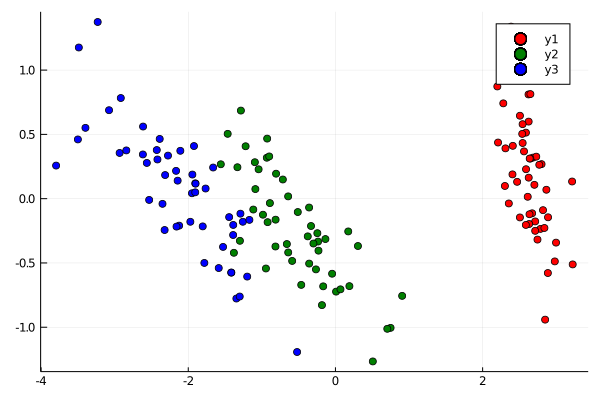

In [8]:
scatter(i_transform'[1:50,1], i_transform'[1:50,2], markercolor=[:red])
scatter!(i_transform'[51:100,1], i_transform'[51:100,2], markercolor=[:green])
scatter!(i_transform'[101:150,1], i_transform'[101:150,2], markercolor=[:blue])